<a href="https://colab.research.google.com/github/josegabrielguerrero26/CSE450-machinelearning/blob/main/final/trustlevel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ** INTRODUCTION**
This is a db with categorical and descriptive data of customers in a U.S business unit.

The business is dedicated to rent cars to customers and the objectives of this machine learning model is to categorize if the customers has a high, medium or low trust level.

High level indicates that I should rent.

Medium possible danger and so it needs to go over second operational revision process.

Low must not rent the car.

** The numbers, names have been changed to protect the data **

## Libraries- Dataset

In [80]:
#!pip install ydata_profiling # data Table Analysis
#!pip install typing_extensions # data Table Analysis
#!pip install imblearn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt # for graphs
from sklearn.model_selection import train_test_split #Model Split to train
from sklearn.metrics import accuracy_score           #Accuracy model
from sklearn.preprocessing import StandardScaler


In [81]:
cus = pd.read_csv('/content/cust_test.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/content/cust_test.csv'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
cus.head(5)



## Table Description

In [82]:
cus.describe(include='all')
cus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   cust_id          50000 non-null  int64 
 1   cust_birth_date  49999 non-null  object
 2   country          50000 non-null  object
 3   times            50000 non-null  int64 
 4   cash_vs_card     50000 non-null  object
 5   pay_level        50000 non-null  object
 6   marital          50000 non-null  object
 7   level_edu        50000 non-null  object
 8   salary           50000 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 3.4+ MB


In [83]:
cus.nunique()


cust_id            50000
cust_birth_date    16060
country               11
times                169
cash_vs_card           3
pay_level              3
marital                2
level_edu              4
salary             44159
dtype: int64

In [84]:
#nun values
nan_count = cus.isnull().sum().sum()
print('Number of NaN values:', nan_count)

Number of NaN values: 1


## Data Wrangling - Missing Values, transformation


https://jamesrledoux.com/code/imputation

In [85]:
#unkown values

(cus=='unknown').sum()

cust_id            0
cust_birth_date    0
country            0
times              0
cash_vs_card       0
pay_level          0
marital            0
level_edu          0
salary             0
dtype: int64

In [86]:
# most common imputed

df_im = cus.apply(lambda x: x.fillna(x.value_counts().index[0]))
df_im.head(10)

,cust_id,cust_birth_date,country,times,cash_vs_card,pay_level,marital,level_edu,salary
0,1,3/14/1994,UTAH,4,cash,LOW,married,elementary,211637
1,2,5/6/1970,MEXICO,1,cash,HIGH,single,elementary,129657
2,3,5/17/1973,UTAH,1,cash,LOW,married,high_school,160686
3,4,5/9/1976,MEXICO,5,cash,HIGH,married,college,86044
4,5,4/29/1989,MEXICO,1,card,HIGH,married,high_school,192280
5,6,5/19/1990,MEXICO,1,card,HIGH,single,college,174214
6,7,11/13/1969,UTAH,1,cash,LOW,married,elementary,241201
7,8,4/18/1990,UTAH,1,cash,LOW,single,college,108272
8,9,12/13/1998,UTAH,1,cash,LOW,married,high_school,101684
9,10,2/6/1976,UTAH,5,cash,MEDIUM,married,college,195417


<ipython-input-87-cc359407d008>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrMatrix = df_im.corr()


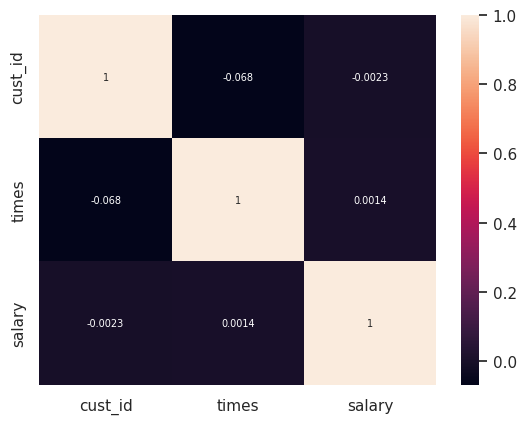

<Figure size 2000x1000 with 0 Axes>

,cust_id,times,salary
cust_id,1.000000,-0.067594,-0.002294
times,-0.067594,1.000000,0.001357
salary,-0.002294,0.001357,1.000000


In [87]:
corrMatrix = df_im.corr()
sns.heatmap(corrMatrix, annot=True, annot_kws={"size": 7})
plt.figure(figsize=(20, 10))
plt.show()

corrMatrix

## Encoded Values

In [88]:
df_im['pay_level'].unique()

array(['LOW', 'HIGH', 'MEDIUM'], dtype=object)

In [89]:
# label encoded values

df_im['country'] = df_im['country'].astype('category')
df_im['cash_vs_card'] = df_im['cash_vs_card'].astype('category')
df_im['pay_level'] = df_im['pay_level'].astype('category')
df_im['level_edu'] = df_im['level_edu'].astype('category')
df_im['marital'] = df_im['marital'].astype('category')
df_im['cust_birth_date'] = pd.to_datetime(df_im.cust_birth_date)
df_im['year'] = df_im.datetime.dt.year
df_im['month'] = df_im.datetime.dt.month
df_im['day'] = df_im.datetime.dt.day

# cat codes
df_im['country'] = df_im['country'].cat.codes
df_im['cash_vs_card'] = df_im['cash_vs_card'].cat.codes
df_im['level_edu'] = df_im['level_edu'].cat.codes
df_im['marital']=df_im['marital'].cat.codes


ParserError: year 0 is out of range: 0000-00-00 present at position 840

df_im.columns

In [ ]:
df_im['pay_level'].unique()

In [ ]:
df_im['pay_level'] = np.where(df_im["pay_level"] == "LOW", 1,
                               np.where(df_im["pay_level"] == "MEDIUM", 2, 3))


In [ ]:
df_im['pay_level']. unique()

In [ ]:
corrMatrix = df_im.corr()
sns.heatmap(corrMatrix, annot=True, annot_kws={"size": 7})
plt.figure(figsize=(20, 10))
plt.show()

corrMatrix

In [ ]:
d

## Standarized

In [ ]:
# Use StandardScaler() to normolize data around a mean of 0

## Data Table Analysis

In [ ]:
sns.set()
sns.set_style('white')
graph1=sns.histplot(data=df_im, x='age', bins='auto')#hue='species'
graph1.set_title("Age Histogram")

In [ ]:
sns.set()
sns.set_style('white')

graph2 = sns.countplot(data=df_im, x='poutcome', hue='marital')

# Create a FacetGrid for further customization
facet_grid = sns.FacetGrid(df_im, row="contact", col='marital', # row="education"
                            height=5, aspect=1)#col_wrap=2
# Map the countplot onto the FacetGrid
facet_grid.map(sns.countplot, "poutcome", order=df_im['poutcome'].unique())
# Add a legend
facet_grid.add_legend(title='Marital Status', bbox_to_anchor=(1, 1))
# Set the overall title
facet_grid.fig.suptitle("Response by Marital Status and Education", y=1.02)
facet_grid.set_titles(fontsize=25)
plt.show()


In [ ]:
#!pip install typing_extensions

In [ ]:
#from ydata_profiling import ProfileReport, compare

In [ ]:
'''report= ProfileReport(df=df_im, title="test")
report.to_notebook_iframe()'''

# Machine Learning Model




Machine Learning Steps
Almost universally, regardless of which algorithm or type of task we're performing, building and evaluating a machine learning model with sklearn follows these steps:

* Perform any data preprocessing needed.
* Partition the data into features and targets.
* Split the data into training and test sets (and sometimes a third validation set).
* Create a configure whichever sklearn model object we're using.
* Train the model using its "fit" method.
* Test the model using its "predict" method.
* Use a model evaluation metric to see how well the model performs.
* If the model isn't performing well, we will repeat one or more of the above steps (sometimes all of them).

Once the model is performing adequately, we'll deploy it for use as part of some larger system.

For now, let's assume that this dataset is in the form we need, and we'll skip to step 2, partitioning the data.

In [ ]:
pd.set_option('display.max_columns', None)
df_im.head(5)

In [ ]:
df_im.columns

In [ ]:
# Create a new dataframe called X that contians the features we're going
# to use to make predictions
X = df_im[['age', 'marital', 'contact',
        'previous','nr.employed',
       'euribor3m']]
X.head(5)

In [ ]:
# Create a new dataframe called y that contians the target we're
# trying to predict
y=df_im['y']
y.unique()

## Split Data

In [ ]:

# Import and use the train_test_split() function to split the X and y
# dataframes into training and test sets.
#
# The training data should contain 80% of the samples and
# the test data should contain 20% of the samples.
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(
          X, y, test_size=0.3, random_state=1)

# Use StandardScaler() to normolize data around a mean of 0
scaler = StandardScaler()
X_scaler = scaler.fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
print(X_test_scaled)



In [ ]:
# it seems that my Y training is imbalance becasue the non existing is bigger than other outcomes
ax=sns.histplot(data=y_train)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

## Dealing with imbalance

https://www.analyticsvidhya.com/blog/2021/06/5-techniques-to-handle-imbalanced-data-for-a-classification-problem/

In [ ]:
!pip install imblearn

In [ ]:
'''from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=1)

X_new, y_new= rus.fit_resample(X_train_scaled, y_train)#X_train_scaled  X_train

y_new.value_counts()'''

In [ ]:
#oversampling
from imblearn.over_sampling import RandomOverSampler
# https://imbalanced-learn.readthedocs.io/en/stable/user_guide.html

ro = RandomOverSampler()

X_new, y_new = ro.fit_resample(X_train_scaled, y_train)

y_new.value_counts()

In [ ]:
ax=sns.histplot(data=y_new)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

## Training the tree model

In [ ]:
 from sklearn import tree

In [ ]:
clf = tree.DecisionTreeClassifier(max_leaf_nodes=10)#max_leaf_nodes=10, random_state=0

In [ ]:
clf = clf.fit(X_new, y_new)

In [ ]:
tree.plot_tree(clf)

In [ ]:

# Identify the most important columns
# The zip function pairs each object
importance = clf.feature_importances_
df = pd.DataFrame(list(zip(importance, X.columns.to_list())),columns =['importance', 'feature'])
#print(importance,X.columns.to_list())

df = df.sort_values(by='importance')
df.head()


In [ ]:
# Visualize a bar graph of feature importance scores
sns.set(rc={'figure.figsize':(11,8)})
sns.barplot(data=df,x='importance',y='feature')
# number employed is being used as an indicator of how the economy is doing

## Predictions with Model

In [ ]:
test_predictions=clf.predict(X_test_scaled) #X_test_scaled

In [ ]:
test_predictions

In [ ]:
y_train.count()

## Evaluate

In [ ]:
#Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, test_predictions)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, test_predictions))

In [ ]:
# confution Matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, test_predictions)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
sns.set()

unique_labels = np.unique(y_test)

sns.heatmap(cm,fmt="d", annot=True, cmap="Blues",
             xticklabels=unique_labels, yticklabels=unique_labels)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

## Use model

In [ ]:
df_use=pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bank_holdout_test_mini.csv')

In [ ]:
df_use.info()

In [ ]:
import numpy as np
df = df_use
df.replace(r"unknown", np.nan, inplace=True)

In [ ]:
df_use = df_use.apply(lambda x: x.fillna(x.value_counts().index[0]))
df_use['marital'] = df_use['marital'].astype('category')
df_use['contact'] = df_use['contact'].astype('category')
df_use['default'] = df_use['default'].astype('category')
df_use['housing'] = df_use['housing'].astype('category')
df_use['loan'] = df_use['loan'].astype('category')
df_use['day_of_week'] = df_use['day_of_week'].astype('category')


# cat codes
df_use['marital'] = df_use['marital'].cat.codes
df_use['contact'] = df_use['contact'].cat.codes
df_use['default'] = df_use['default'].cat.codes
df_use['housing'] = df_use['housing'].cat.codes
df_use['day_of_week'] = df_use['day_of_week'].cat.codes
df_use=pd.get_dummies(df_use, columns=['job'], drop_first=True)
df_use=pd.get_dummies(df_use, columns=['education'], drop_first=True)
df_use = pd.get_dummies(df_use, columns=['month'], drop_first=True)

In [ ]:
df_use['poutcome'] = np.where((df_use["poutcome"] == "nonexistent") | (df_use["poutcome"] == "failure"), 0, 1)

In [ ]:
df_use

In [ ]:
X_use = df_use[['age', 'marital', 'contact',
        'previous','nr.employed',
       'euribor3m']]
X.head(5)


In [ ]:
X_use.count()
X_test_scaled = X_scaler.transform(X_use)

In [ ]:
test_predictions1=clf.predict(X_test_scaled)



In [ ]:
# Create a DataFrame with predictions
predictions_df1 = pd.DataFrame({'Prediction': test_predictions1})

# Save predictions to a CSV file
predictions_df1.to_csv('team8-module2-predictions.csv', index=False)